# Задание 1. Разведочный анализ данных (EDA)
### Виноградова Анна. Группа: 25.М81-мм

Выполненные задания (все):

1) **Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.**
2) **Считать данные и вывести их основные характеристики, описание признаков.**
3) **Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.**
4) **(+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.**
5) **Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.**
6) **(+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).**
7) **(+2 балла) Выполнить полезные преобразования данных, убрать ненужные признаки, создать новые (Feature Engineering).**

Для анализа был взят [датасет](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) о сердечных заболеваниях. 
Описание набора данных:
- *Age* -  возраст в годах;
- *Sex* - пол человека (M/F);
- *ChestPainType* - тип боли в груди (TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинозная боль, ASY: бессимптомная);
- *RestingBP* - артериальное давление в состоянии покоя (мм рт. ст.);
- *Cholesterol* - общий холестерин (мм/дл);
- *FastingBS* - уровень сахара в крови натощак (1: если FastingBS > 120 мг/дл (граничное значение нормы), 0: в противном случае);
- *RestingECG* - результаты электрокардиограммы в состоянии покоя (Норма: норма, ST: наличие аномалии ST-T, LVH: наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса);
- *MaxHR* - максимальная достигнутая частота сердечных сокращений;
- *ExerciseAngina* - стенокардия, вызванная физической нагрузкой (Y = да, N = нет);
- *Oldpeak* - показатель депрессии сегмента ST относительно нормы (измеряется в условных единицах, отражает снижение ST);
- *ST_Slope* - наклон сегмента ST при нагрузке (Up = восходящий, Flat = горизонтальный, Down = нисходящий);
- *HeartDisease* - наличие болезни сердца (1 = болезнь обнаружена, 0 = норма).

Ниже представлены первые 5 строк датасета.

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Анна/Documents/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [316]:
cols_with_zeros = ['Cholesterol', 'RestingBP']  # признаки, где 0 - пропуск
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

Формально в датасете отсутствуют явные пропуски (значения NaN), что подтверждает результат метода info(). Однако при детальном анализе можно обнаружить скрытые пропуски, закодированные значением 0 в ряде числовых признаков. Например, в признаке Cholesterol встречаются нулевые значения, которые биологически невозможны (уровень холестерина не может равняться нулю) и, как следствие, отражают отсутствие данных. 

Пред нами стоит задача бинарной классификации, необходимо предсказать целовой признак HeartDisease - наличие болезни сердца по другим признакам.

## Анализ признаков
### Признак Age
Числовой признак age. В данной выборке возраст варьируется от 28 до 77 лет. Средний возраст - 53.5 лет, при этом медиана - 54 года, что говорит о близком к симметричному распределению данных.

In [317]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

<Axes: >

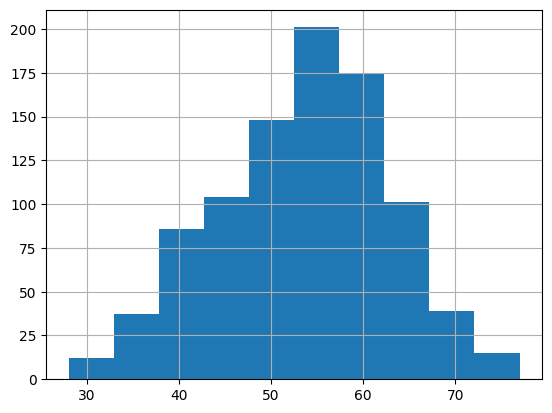

In [318]:
df['Age'].hist()

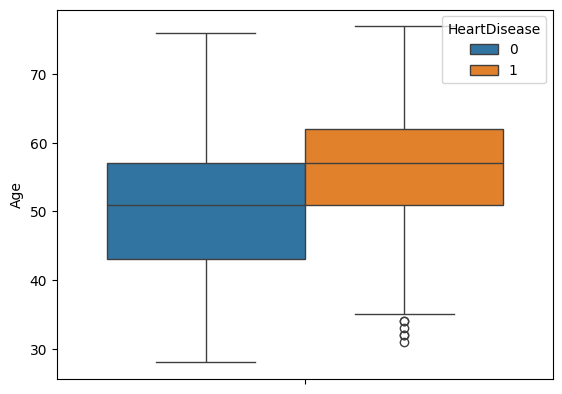

In [319]:
sns.boxplot(y='Age', hue='HeartDisease',data=df);

<Axes: xlabel='Sex', ylabel='Age'>

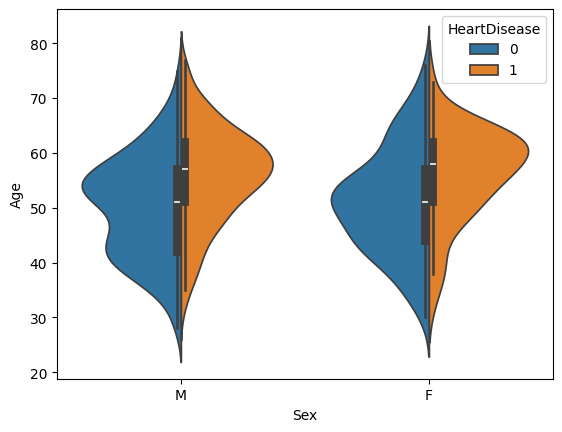

In [320]:
sns.violinplot(x="Sex", y="Age", hue="HeartDisease", data=df, split=True)

С возрастом риск наличия сердечно-сосудистого заболевания выше. Сердечно-сосудистые заболевания у мужчин проявляются раньше, чем у женщин. Признак возраста кажется важным для прогнозирования.

### Признак Sex
Рассмотрим следующий признак - Sex (категориальный). Ниже представлены графики распределения значений признака, в том числе относительно целевой переменной.

<Axes: xlabel='Sex', ylabel='count'>

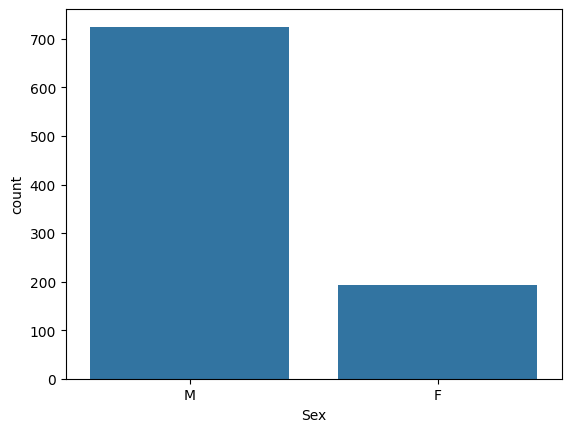

In [321]:
sns.countplot(x='Sex', data=df)

In [322]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

<Axes: xlabel='Sex', ylabel='HeartDisease'>

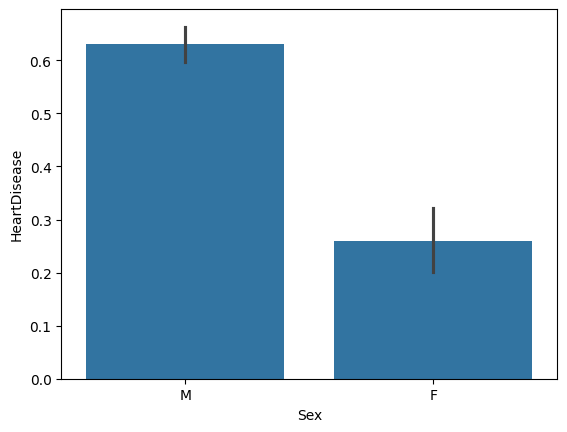

In [323]:
sns.barplot(x = "Sex", y = "HeartDisease", data = df)

В выборке представлено больше мужчин (725 наблюдений против 193). Также различается распределение целевой переменной HeartDisease среди мужчин и женщин: среди женщин заболевание сердца выявлено у 50 из 193 (~26%), среди мужчин - у 458 из 725 (~63%).


### Признак ChestPainType
Категориальный признак, принимающий 4 возможных значения, кодирующий тип боли: TA, ATA, NAP, ASY.

<Axes: xlabel='ChestPainType', ylabel='count'>

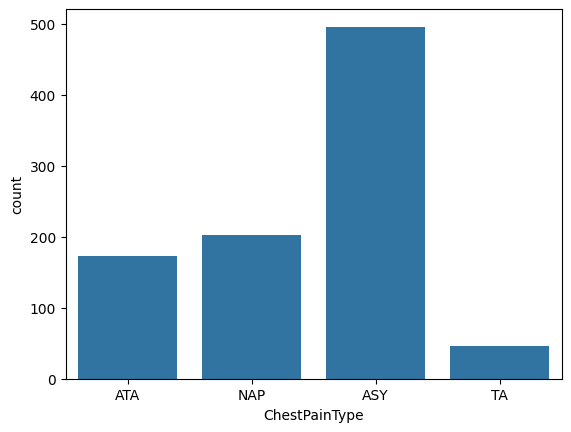

In [324]:
sns.countplot(x='ChestPainType', data=df)

<Axes: xlabel='ChestPainType', ylabel='count'>

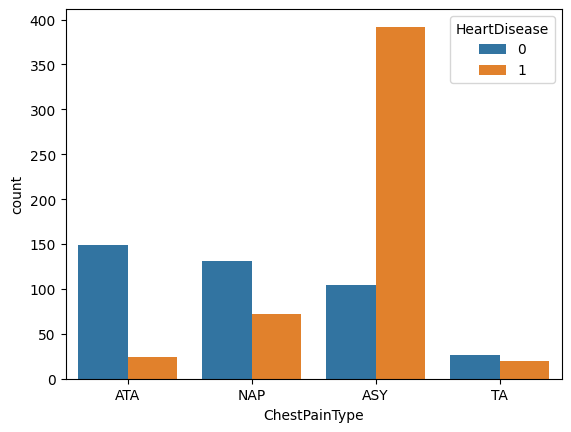

In [325]:
sns.countplot(x="ChestPainType", hue="HeartDisease", data=df)

<Axes: xlabel='ChestPainType', ylabel='Age'>

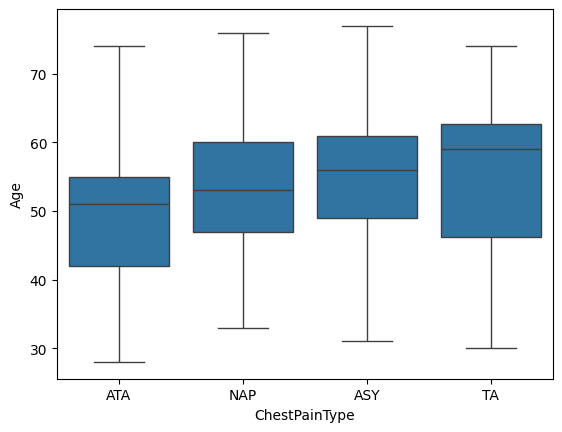

In [326]:
sns.boxplot(x="ChestPainType", y="Age", data=df)

<Axes: xlabel='ChestPainType', ylabel='HeartDisease'>

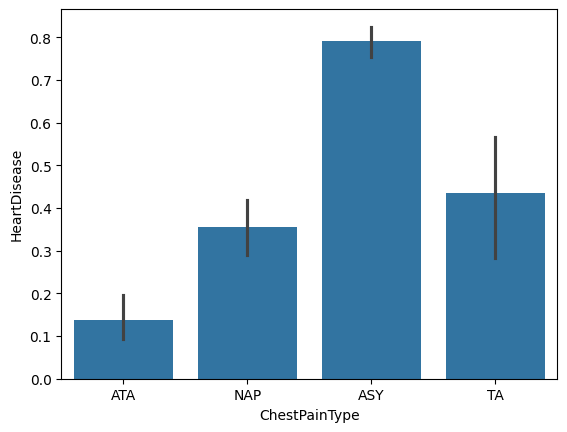

In [327]:
sns.barplot(x='ChestPainType', y='HeartDisease', data=df)

Вероятность наличия сердечного заболевания выше у пациентов без симптомов(ASY) и при типичной стенокардии (TA). Кроме того, именно в этих категориях находится более возрастная группа. В то же время группа с атипичной стенокардией (ATA) характеризуется наименьшим риском и более молодой выборкой.


### Признак RestingBP
Числовой признак, отображающий артериальное давление в состоянии покоя. Значения 0 в этом столбце - скрытый пропуск, который необходимо обработать.

In [328]:
df['RestingBP'].describe()

count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

<Axes: >

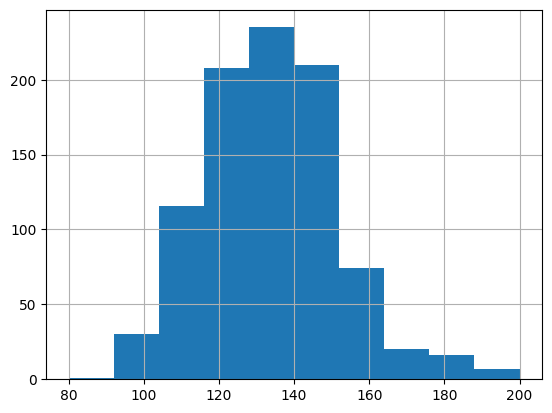

In [329]:
df['RestingBP'].hist()

<Axes: xlabel='Sex', ylabel='RestingBP'>

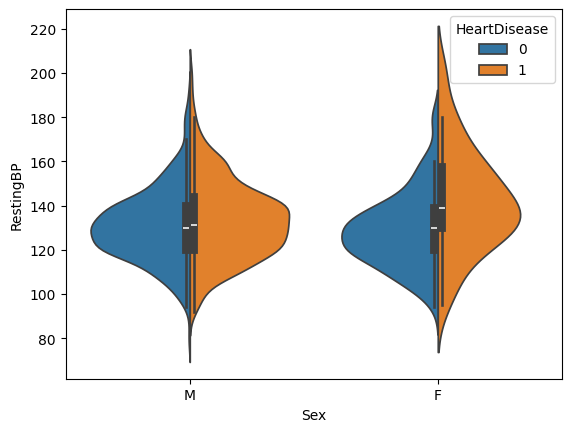

In [330]:
sns.violinplot(x='Sex', y='RestingBP', hue='HeartDisease',data=df, split=True)

In [331]:
bins = [0, 40, 55, 65, 80]
labels = ['<40', '40-55', '55-65','65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.groupby(['Sex', 'AgeGroup', 'HeartDisease'])['RestingBP'].median()

C:\Users\Анна\AppData\Local\Temp\ipykernel_12684\2027230261.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Sex', 'AgeGroup', 'HeartDisease'])['RestingBP'].median()


Sex  AgeGroup  HeartDisease
F    <40       0               120.0
               1               107.5
     40-55     0               125.0
               1               135.0
     55-65     0               133.5
               1               140.0
     65+       0               130.0
               1               160.0
M    <40       0               130.0
               1               119.0
     40-55     0               130.0
               1               130.0
     55-65     0               130.5
               1               134.0
     65+       0               139.0
               1               140.0
Name: RestingBP, dtype: float64

У людей с болезнью сердца медианное давление обычно выше, чем у людей без болезни как у мужчин, так и женщин. При этом у обоих полов молодые больные имеют давление чуть ниже. Наиболее сильное различие у женщин 65+, где медианное давление у больных на 30 единиц выше, чем у здоровых.
У мужчин картина более неоднозначная. В целом можно сказать, что повышенное давление коррелирует с наличием сердечно-сосудистых заболеваний у женщин среднего и пожилого возраста.

<Axes: xlabel='ChestPainType', ylabel='RestingBP'>

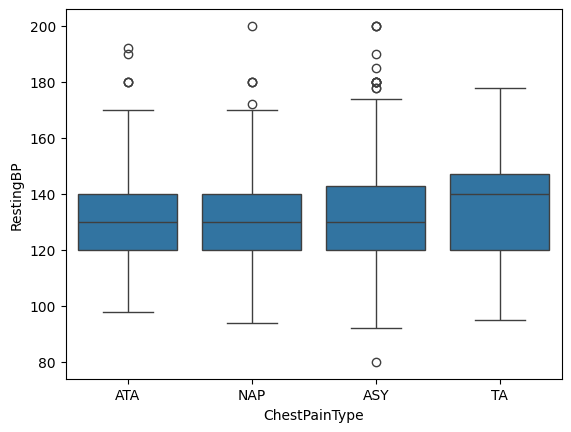

In [332]:
sns.boxplot(x='ChestPainType', y='RestingBP', data=df)

In [333]:
df.groupby(['Sex', 'FastingBS' ])['RestingBP'].mean()

Sex  FastingBS
F    0            131.706587
     1            135.461538
M    0            131.917910
     1            134.654255
Name: RestingBP, dtype: float64

Cреднее давление мало отличается по группам ChestPainType, кроме TA (типичная стенокардия), где давление выше. У людей с преддиабетом и диабетом (FastingBS = 1) среднее давление также выше.

#### Восстановление пропущенных значений
В данных есть пропущенные значения (для анализа ранее 0 был заменен на NaN в данных). Заполним их медианным значением в той же возрастной и половой группе.

In [334]:
# найдем медианы призн RestingBP по полу и возрастным группам, созданным ранее
group_median=df.groupby(['Sex', 'AgeGroup'])['RestingBP'].median()
group_median

C:\Users\Анна\AppData\Local\Temp\ipykernel_12684\4081796687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_median=df.groupby(['Sex', 'AgeGroup'])['RestingBP'].median()


Sex  AgeGroup
F    <40         120.0
     40-55       130.0
     55-65       140.0
     65+         140.0
M    <40         120.0
     40-55       130.0
     55-65       134.0
     65+         140.0
Name: RestingBP, dtype: float64

In [335]:
df.loc[df['RestingBP'].isna(), 'RestingBP'] = (
    df.loc[df['RestingBP'].isna(), ['Sex', 'AgeGroup']]
      .apply(lambda x: group_median.loc[(x['Sex'], x['AgeGroup'])], axis=1)
)

### Признак Cholesterol
Числовой признак, отображающий общий холестерин (в мм/дл).

In [336]:
df['Cholesterol'].describe()

count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64

<Axes: >

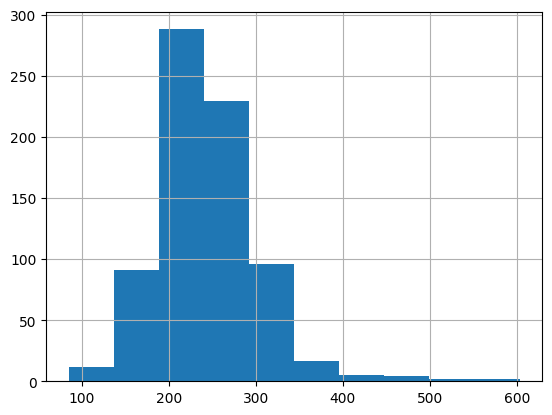

In [337]:
df['Cholesterol'].hist()

<Axes: xlabel='AgeGroup', ylabel='Cholesterol'>

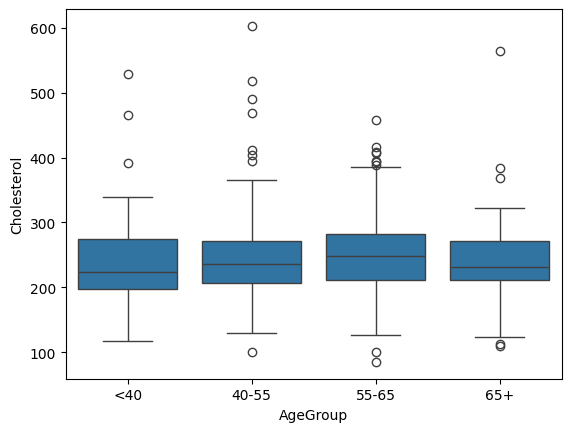

In [338]:
sns.boxplot(data=df, x='AgeGroup', y='Cholesterol')

<Axes: xlabel='Sex', ylabel='Cholesterol'>

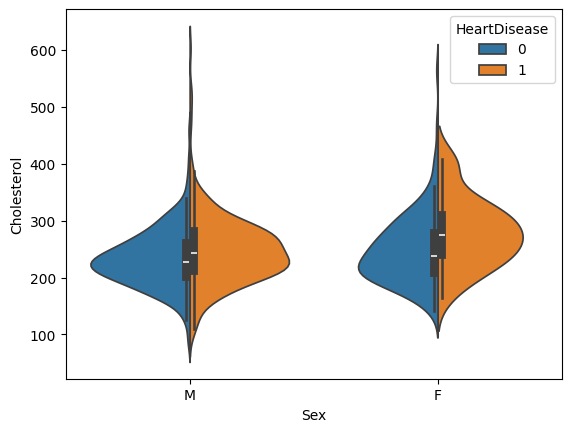

In [339]:
sns.violinplot(x="Sex", y="Cholesterol", hue="HeartDisease", data=df,split=True)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

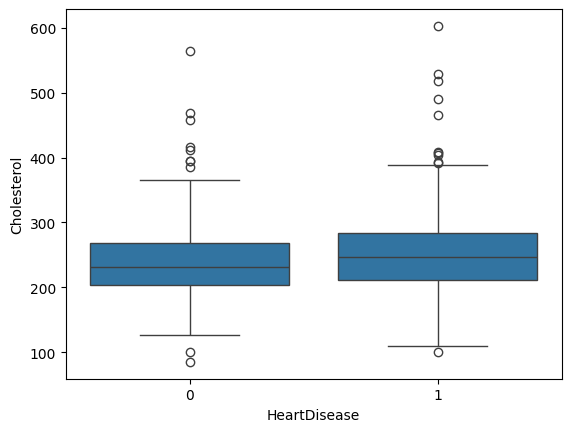

In [340]:
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol')

<Axes: xlabel='ChestPainType', ylabel='Cholesterol'>

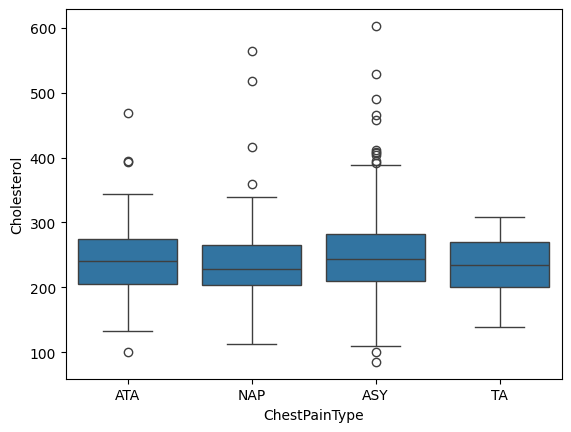

In [341]:
sns.boxplot(x='ChestPainType', y='Cholesterol', data=df)

In [342]:
df.groupby(['Sex', 'FastingBS', 'HeartDisease'])['Cholesterol'].mean()

Sex  FastingBS  HeartDisease
F    0          0               247.621212
                1               275.903226
     1          0               269.800000
                1               290.444444
M    0          0               232.241860
                1               246.329218
     1          0               236.484848
                1               251.410959
Name: Cholesterol, dtype: float64

В среднем у женщин холестерин выше, чем у мужчин. У обоих полов при наличии преддиабета или диабета медианное значение холестерина выше, чем при нормальном уровне сахара. Также во всех случаях средний уровень холестерина у больных сердечно-сосудистыми заболеваниями выше значения у здоровых пациентов. Признак Cholesterol демонстрирует зависимость от других факторов риска (пол, диабет), это можно использовать для восстановления пропущенных значений.

#### Восстановление пропущенных значений 
Данный признак имеет 172 пропущенных значений, которые необходимо заполнить. Для восстановления пропущенных значений попробуем использовать медиану, рассчитанную в соответствующих подгруппах пола и диабета. Не учитываем возраст, так как для некоторых комбинаций (например, женщин моложе 40 лет с диабетом) в выборке отсутствуют данные. Для второго метода восстановления значения возьмем метод k-Nearest Neighbors.

In [343]:
df.groupby(['Sex', 'FastingBS', 'AgeGroup'])['Cholesterol'].median()

C:\Users\Анна\AppData\Local\Temp\ipykernel_12684\2144165966.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Sex', 'FastingBS', 'AgeGroup'])['Cholesterol'].median()


Sex  FastingBS  AgeGroup
F    0          <40         210.5
                40-55       237.5
                55-65       272.5
                65+         239.0
     1          <40           NaN
                40-55       273.0
                55-65       294.0
                65+         246.5
M    0          <40         240.0
                40-55       233.0
                55-65       233.0
                65+         229.0
     1          <40         306.5
                40-55       233.0
                55-65       254.0
                65+         225.0
Name: Cholesterol, dtype: float64

In [344]:
group_median_ch=df.groupby(['Sex', 'FastingBS'])['Cholesterol'].median()

In [345]:
print("Корреляция (без восстановленных значений) - ", df[['Cholesterol', 'HeartDisease']].corr().iloc[0, 1])

# 1 метод - восстановление по группам (пол-диабет)
df_group = df.copy()

df_group.loc[df_group['Cholesterol'].isna(), 'Cholesterol'] = (
    df_group.loc[df_group['Cholesterol'].isna(), ['Sex', 'FastingBS']].apply(lambda x: group_median_ch.loc[(x['Sex'], x['FastingBS'])], axis=1))

corr_group = df_group[['Cholesterol', 'HeartDisease']].corr().iloc[0, 1]
print("Корреляция (восстановление по группам ) - ", corr_group)

# 2 метод - восстановление с помощью KNNImputer
from sklearn.impute import KNNImputer
df_knn = df.copy()
num_cols = df_knn.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('HeartDisease')
imputer = KNNImputer(n_neighbors=3)
df_knn[num_cols] = imputer.fit_transform(df_knn[num_cols])

corr_knn = df_knn[['Cholesterol', 'HeartDisease']].corr().iloc[0, 1]
print("Корреляция (KNNImputer):", corr_knn)
df_knn[num_cols]

Корреляция (без восстановленных значений) -  0.10386559562465626
Корреляция (восстановление по группам ) -  0.0823346079499543
Корреляция (KNNImputer): 0.09941408622536854


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40.0,140.0,289.0,0.0,172.0,0.0
1,49.0,160.0,180.0,0.0,156.0,1.0
2,37.0,130.0,283.0,0.0,98.0,0.0
3,48.0,138.0,214.0,0.0,108.0,1.5
4,54.0,150.0,195.0,0.0,122.0,0.0
...,...,...,...,...,...,...
913,45.0,110.0,264.0,0.0,132.0,1.2
914,68.0,144.0,193.0,1.0,141.0,3.4
915,57.0,130.0,131.0,0.0,115.0,1.2
916,57.0,130.0,236.0,0.0,174.0,0.0


In [346]:
df = df_knn.copy()

### Признак FastingBS
Бинарный признак, отражающий уровень сахара в крови натощак (1: если FastingBS > 120 мг/дл (граничное значение нормы), 0: в противном случае). То есть значение 1 в этом признаке отражает преддиабетное или диабетное состояние. 

<Axes: xlabel='FastingBS', ylabel='count'>

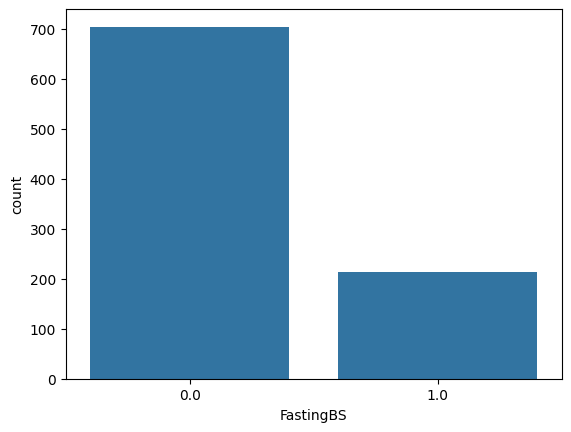

In [347]:
sns.countplot(x='FastingBS', data=df)

<Axes: xlabel='FastingBS', ylabel='HeartDisease'>

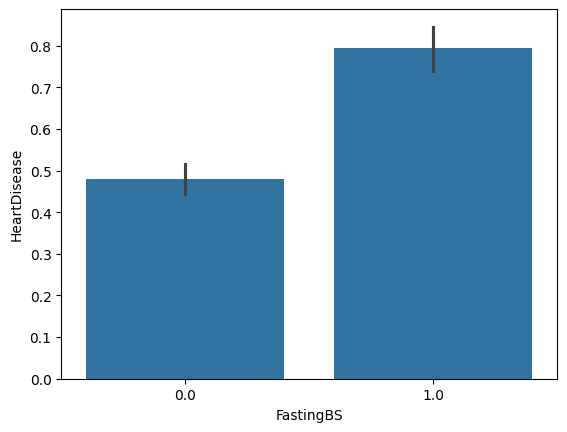

In [348]:
sns.barplot(x='FastingBS', y='HeartDisease', data=df)

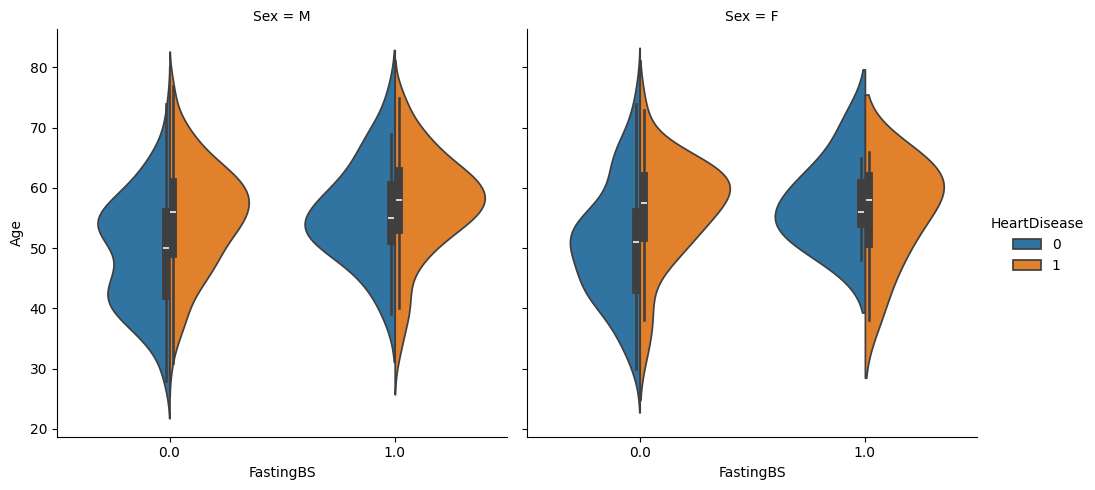

In [349]:
g = sns.catplot(x="FastingBS", y="Age", hue="HeartDisease", kind="violin", data=df, split=True,col="Sex")

Как было замечено ранее, вероятность сердечно-сосудистых заболеваний увеличивается с возрастом у обоих полов. Однако среди пациентов с диабетом или преддиабетом риск проявляется уже в более молодом возрасте. Диабет ускоряет появление факторов риска сердечно-сосудистых заболеваний независимо от пола. 

### Признак RestingECG
Категориальный признак, отражающий результат электрокардиограммы в состоянии покоя (Норма: норма, ST: наличие аномалии ST-T, LVH: наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса)

<Axes: xlabel='RestingECG', ylabel='count'>

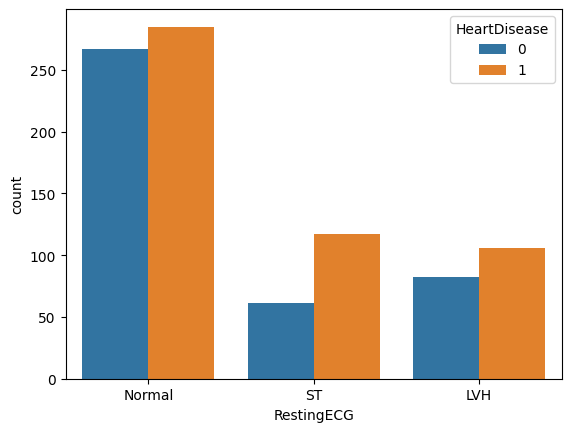

In [350]:
sns.countplot(x='RestingECG', hue='HeartDisease', data=df)

Наличие LVH или ST на ЭКГ связано с более высоким риском сердечно-сосудистых заболеваний. А вот нормальное ЭКГ не указывает на повышенный риск — количество больных и здоровых почти одинаково.
Значения признака LVH и ST должны помочь в предсказании целевой переменной.

### Признак MaxHR
Числовой признак, отражающий максимальную частоту сердечных сокращений. Пропущенных значений нет, принимаемые значения лежат в диапазоне от 60 до 202. 

In [351]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [352]:
df.groupby(['AgeGroup', 'Sex'])['MaxHR'].mean()

C:\Users\Анна\AppData\Local\Temp\ipykernel_12684\2657495264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'Sex'])['MaxHR'].mean()


AgeGroup  Sex
<40       F      162.600000
          M      154.520548
40-55     F      146.313725
          M      138.899054
55-65     F      142.732143
          M      126.194030
65+       F      135.733333
          M      123.208955
Name: MaxHR, dtype: float64

Значения чсс значительно снижаются с возрастом как у мужчин, так и у женщин. Средние значения чсс во всех возрастных группах у женщин выше. 

<Axes: xlabel='Sex', ylabel='MaxHR'>

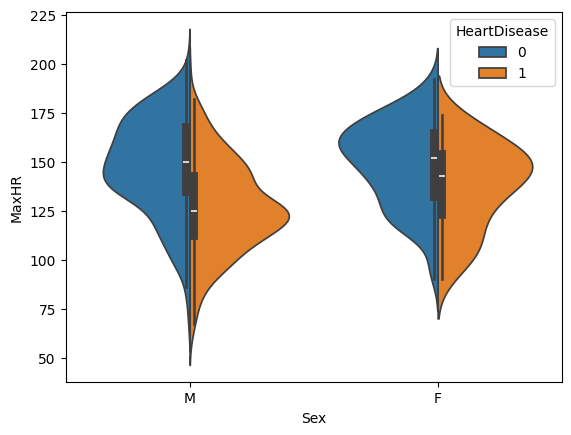

In [353]:
sns.violinplot(x='Sex', y='MaxHR', hue='HeartDisease',data=df, split=True)

<Axes: xlabel='ExerciseAngina', ylabel='MaxHR'>

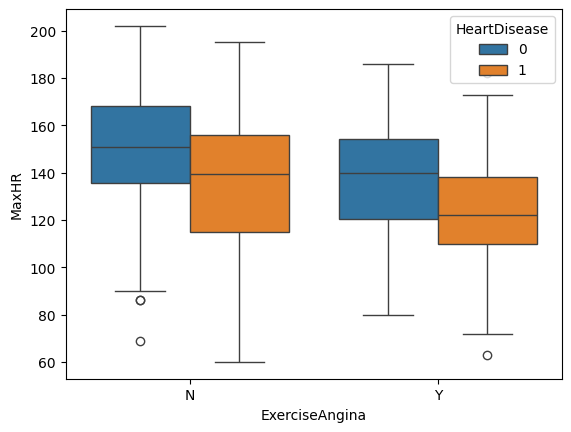

In [354]:
sns.boxplot(x='ExerciseAngina',y='MaxHR',hue='HeartDisease', data=df)

У пациентов без стенокардии (ExerciseAngina=N) и высокой ЧСС риск минимален. Чем ниже максимальная ЧСС, тем выше вероятность наличия заболевания, даже при отсутствии стенокардии. У пациентов же с ExerciseAngina=Y средние значения ЧСС ещё ниже, а риск выше. Признак имеет явную корреляцию с целевым признаком.

### Признак ExerciseAngina
Категориальный признак, отражающий наличие стенокардии (Y = да, N = нет).

<Axes: xlabel='ExerciseAngina', ylabel='count'>

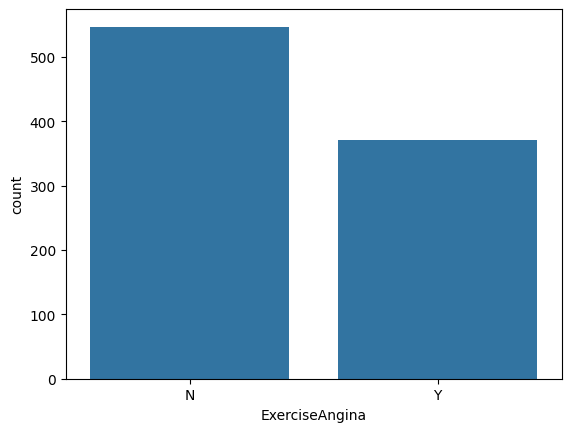

In [355]:
sns.countplot(x='ExerciseAngina', data=df)

<Axes: xlabel='ExerciseAngina', ylabel='HeartDisease'>

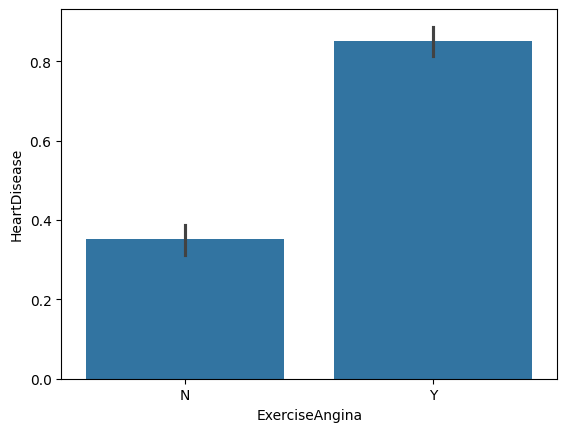

In [356]:
sns.barplot(x='ExerciseAngina', y='HeartDisease', data=df)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

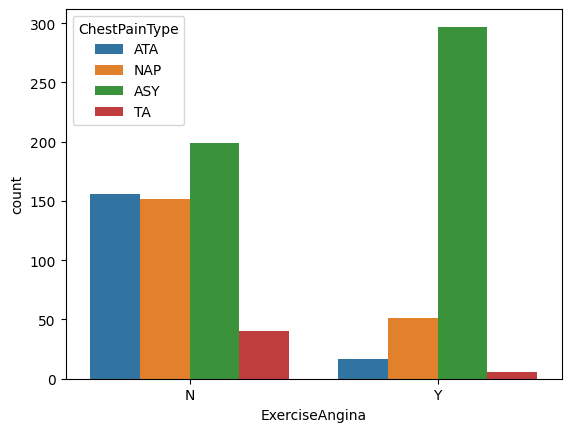

In [357]:
sns.countplot(x='ExerciseAngina', hue='ChestPainType', data=df) 

<Axes: xlabel='Sex', ylabel='Age'>

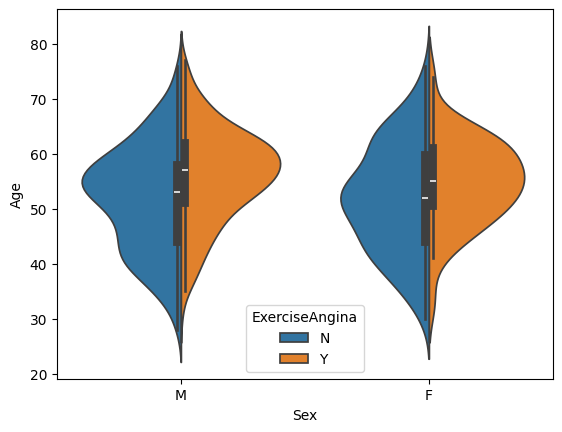

In [358]:
sns.violinplot(x='Sex', y='Age', hue='ExerciseAngina',data=df, split=True)

Наличие ExerciseAngina связано с более высоким риском сердечно-сосудистых заболеваний. При этом среди пациентов с ExerciseAngina чаще встречается тип боли ASY (без явной боли). У мужчин стенокардия проявляется в среднем позже.

### Признак Oldpeak
Числовой признак, показатель депрессии сегмента ST относительно нормы, измеряемый в условных единицах.

In [359]:
df['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

<Axes: >

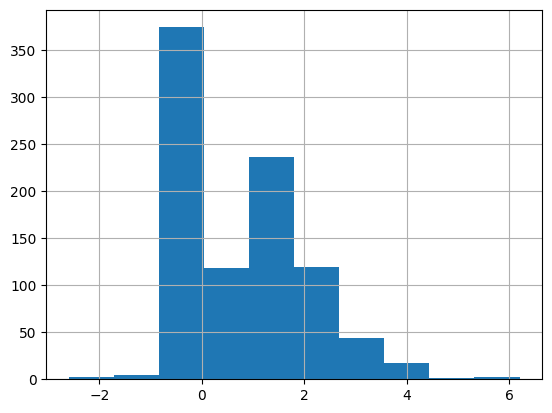

In [360]:
df['Oldpeak'].hist()

<Axes: xlabel='ExerciseAngina', ylabel='Oldpeak'>

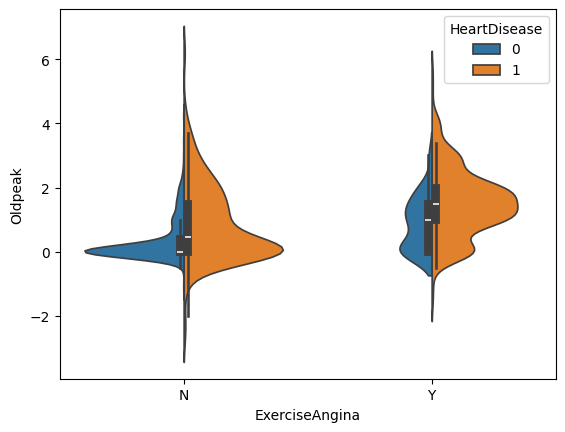

In [361]:
sns.violinplot(x='ExerciseAngina', y='Oldpeak', hue='HeartDisease',data=df, split=True)

При отсутствии стенокардии при нагрузке (ExerciseAngina=N) большинство здоровых пациентов имеют Oldpeak в диапазоне 0-2.
При наличии стенокардии (ExerciseAngina=Y) распределение сдвигается вверх, как у здоровых, так и больных.
То есть повышенные значения Oldpeak связаны с наличием стенокардии и увеличенным риском HeartDisease.

### Признак ST_Slope
Категориальный признак, отображающий наклон сегмента ST при нагрузке (значения: Up = восходящий, Flat = горизонтальный, Down = нисходящий).

<Axes: xlabel='ST_Slope', ylabel='count'>

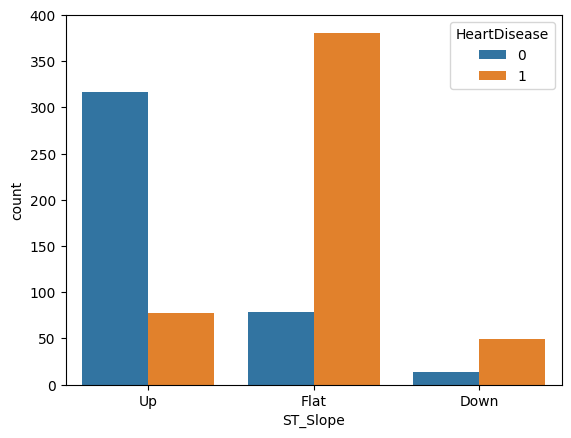

In [362]:
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)

In [363]:
df.groupby(['ST_Slope','HeartDisease'])['ST_Slope'].count()

ST_Slope  HeartDisease
Down      0                14
          1                49
Flat      0                79
          1               381
Up        0               317
          1                78
Name: ST_Slope, dtype: int64

Существует сильная зависимость между наклоном ST сегмента и наличием сердечно-сосудистого заболевания. Горизонтальный (flat) и нисходящий (down) наклон чаще ассоциируется с наличием болезни сердца, а восходящий (up) - с нормой. Однако нисходящий представлен в выборке малым количеством данных.

In [364]:
df.groupby(['ST_Slope'])['Oldpeak'].mean()

ST_Slope
Down    2.152381
Flat    1.188696
Up      0.334684
Name: Oldpeak, dtype: float64

In [365]:
pd.crosstab(df['ST_Slope'], df['ExerciseAngina'])

ExerciseAngina,N,Y
ST_Slope,,
Down,22,41
Flat,188,272
Up,337,58


Существует выраженная связь между наклоном сегмента ST и наличием стенокардии при нагрузке. Горизонтальный и нисходящий наклон чаще ассоциируются с проявлением стенокардии, а восходящий - с её отсутствием. Все вместе делает ST_Slope информативным признаком для предсказания сердечно-сосудистых заболеваний. 

### Признак HeartDisease
Целевая переменная, показывающая наличие сердечно-сосудистого заболевания. Распределение данных:

<Axes: xlabel='HeartDisease', ylabel='count'>

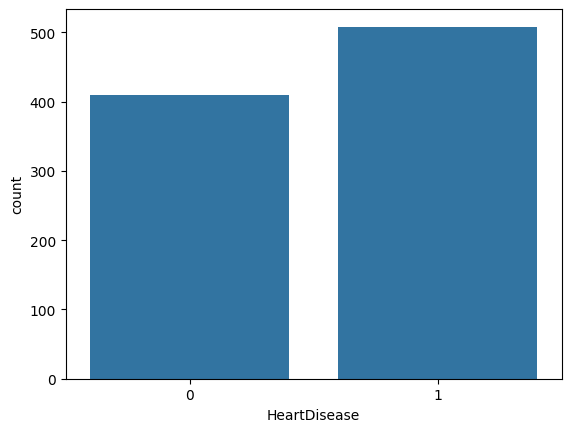

In [366]:
sns.countplot(x='HeartDisease', data=df)

### Преобразования признаков
1) Кодирование категориальных признаков c помощью One Hot Encoding:

In [367]:
chestpain_dummies = pd.get_dummies(df['ChestPainType'], prefix='ChestPain')
df_encoded = pd.concat([df, chestpain_dummies], axis=1)

In [368]:
RestingECG_dummies = pd.get_dummies(df['RestingECG'], prefix='ECG')
df_encoded = pd.concat([df_encoded, RestingECG_dummies], axis=1)

In [369]:
ST_dummies = pd.get_dummies(df['ST_Slope'], prefix='ST')
df_encoded = pd.concat([df_encoded, ST_dummies], axis=1)

2) Категоризация числовых признаков:

In [370]:
df['Age1'] = pd.qcut(df['Age'], 5)
df.groupby(['Age1'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='summer_r')

C:\Users\Анна\AppData\Local\Temp\ipykernel_12684\3904643773.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age1'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='summer_r')


,HeartDisease
Age1,
"(27.999, 45.0]",0.311224
"(45.0, 52.0]",0.513089
"(52.0, 57.0]",0.562189
"(57.0, 62.0]",0.720000
"(62.0, 77.0]",0.709677


In [371]:
df_encoded['Age_category'] = 0
df_encoded.loc[df['Age'] <= 45, 'Age_category'] = 0
df_encoded.loc[(df['Age'] > 45) & (df['Age'] <= 52), 'Age_category'] = 1
df_encoded.loc[(df['Age'] > 52) & (df['Age'] <= 57), 'Age_category'] = 2
df_encoded.loc[(df['Age'] > 57) & (df['Age'] <= 62), 'Age_category'] = 3
df_encoded.loc[(df['Age'] > 62), 'Age_category'] = 4

Для холестерина желательным уровнем является значение меньшее 200 мл/дл, пограничным - до 240, выше - повышенный уровень.

In [372]:
def Cholesterol_category(row):
    if row['Cholesterol'] <200:
        return 1
    elif row['Cholesterol'] >= 200 and row['Cholesterol'] <240:
        return 2
    else:
        return 3

df_encoded['Cholesterol_group'] = df.apply(Cholesterol_category, axis=1)

3) Преобразование в бинарный вид:

In [373]:
df_encoded['Sex']=df['Sex'].apply(lambda x: 0 if x=='F' else 1)

In [374]:
df_encoded['ExerciseAngina']=df['ExerciseAngina'].apply(lambda x: 0 if x=='N' else 1)

### Корреляция признаков
Построим матрицу корреляции для признаков, что были выбраны.

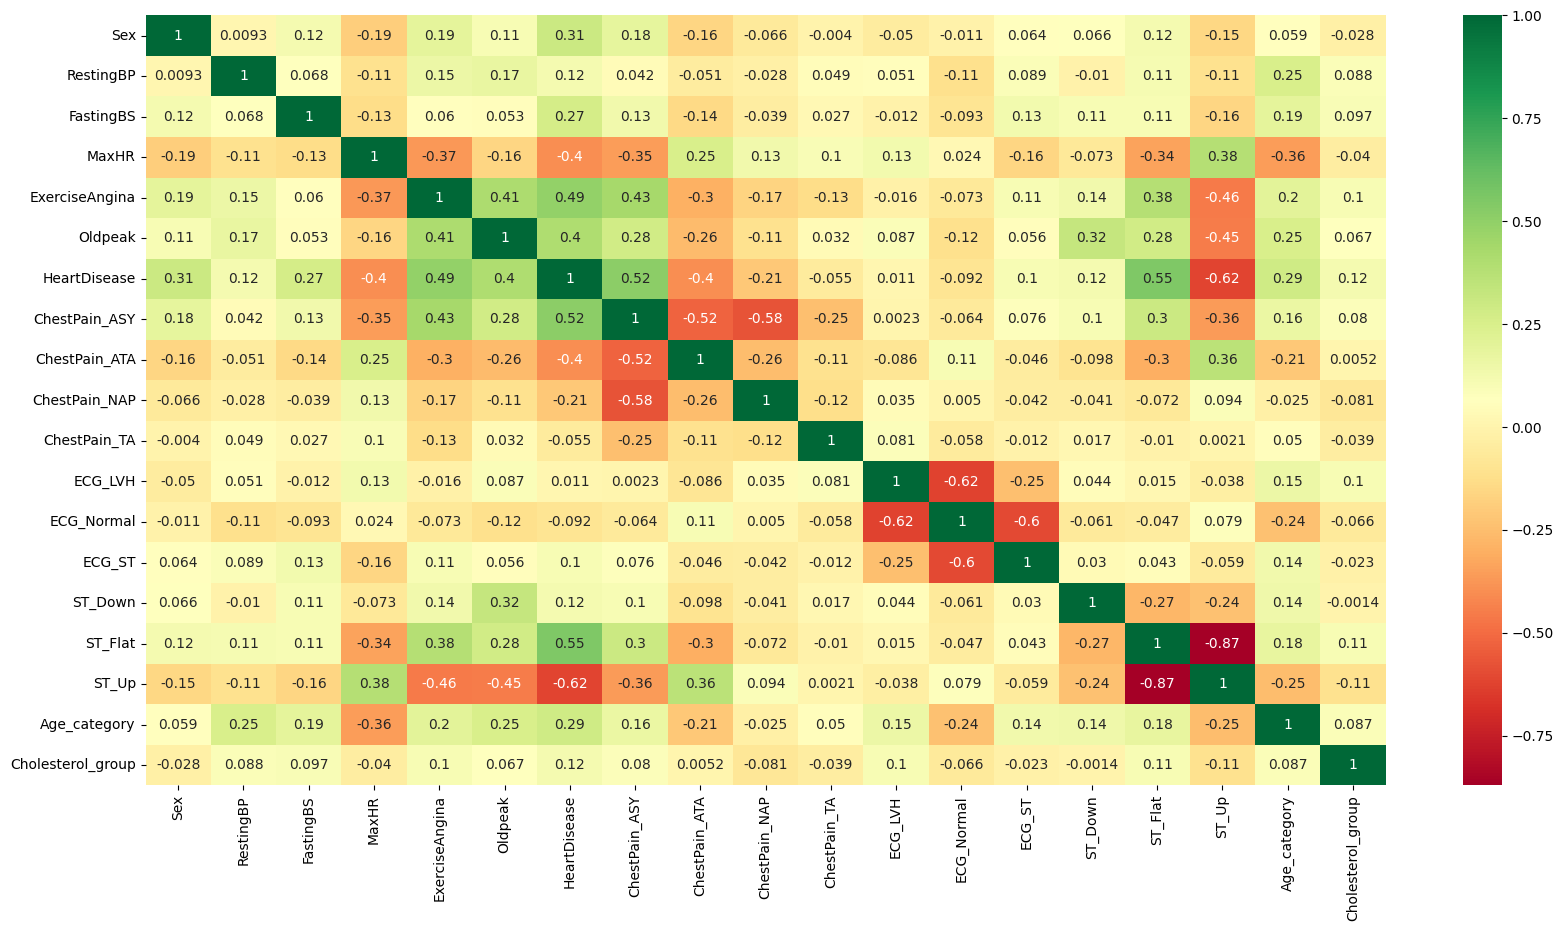

In [375]:
df_encoded.drop(['Age','AgeGroup', 'ChestPainType', 'RestingECG', 'Cholesterol', 'ST_Slope'], axis=1, inplace=True)

sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()